In [27]:
import warnings
warnings.filterwarnings( "ignore", module = "seaborn\..*" )
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
import T2T_ACE.alignment_utilities as au 
import T2T_ACE.validator as v
import T2T_ACE.alignment_scrutinizing_utilities as asu
# Package version:
# mappy 2.26
# pysam 0.22.0
# biopython 1.81

In [4]:
# Update the reference genomes to local path
class ReferenceLocations:
        hg002t2t = "/Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta"
        chm13 = "/Users/gaoyueya/Documents/Reference_Genome/chm13v2.0.fa.gz"
        hg38 = "/Users/gaoyueya/Documents/Reference_Genome/Homo_sapiens_assembly38.fasta"


In [5]:
hg002t2t = au.load_reference(ReferenceLocations.hg002t2t)

INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta


In [6]:
hg38 = au.load_reference(ReferenceLocations.hg38)

INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/Homo_sapiens_assembly38.fasta


In [10]:
# SIMPLE SMALL HET DELETION
simple_het_deletion = "chr1:103900576-103901103"
#ev = evaluate_deletion(ReferenceLocations.hg38, ReferenceLocations.hg002t2t, "chr1:103900576-103901103", hg38, hg002t2t, True)
v.get_flanking_pairs("chr1:103900576-103901103", ReferenceLocations.hg38, hg38, hg002t2t)


chr1:103900075-103900575 chr1:103901103-103901603 527
chr1_MATERNAL:104064755-104065255 chr1_MATERNAL:104065783-104066283 527
chr1_PATERNAL:104150915-104151415 chr1_PATERNAL:104151417-104151917 1


{'ref_flank': [('chr1:103900075-103900575', 'chr1:103901103-103901603', 527)],
 'truth_flank': [('chr1_MATERNAL:104064755-104065255',
   'chr1_MATERNAL:104065783-104066283',
   527),
  ('chr1_PATERNAL:104150915-104151415',
   'chr1_PATERNAL:104151417-104151917',
   1)]}

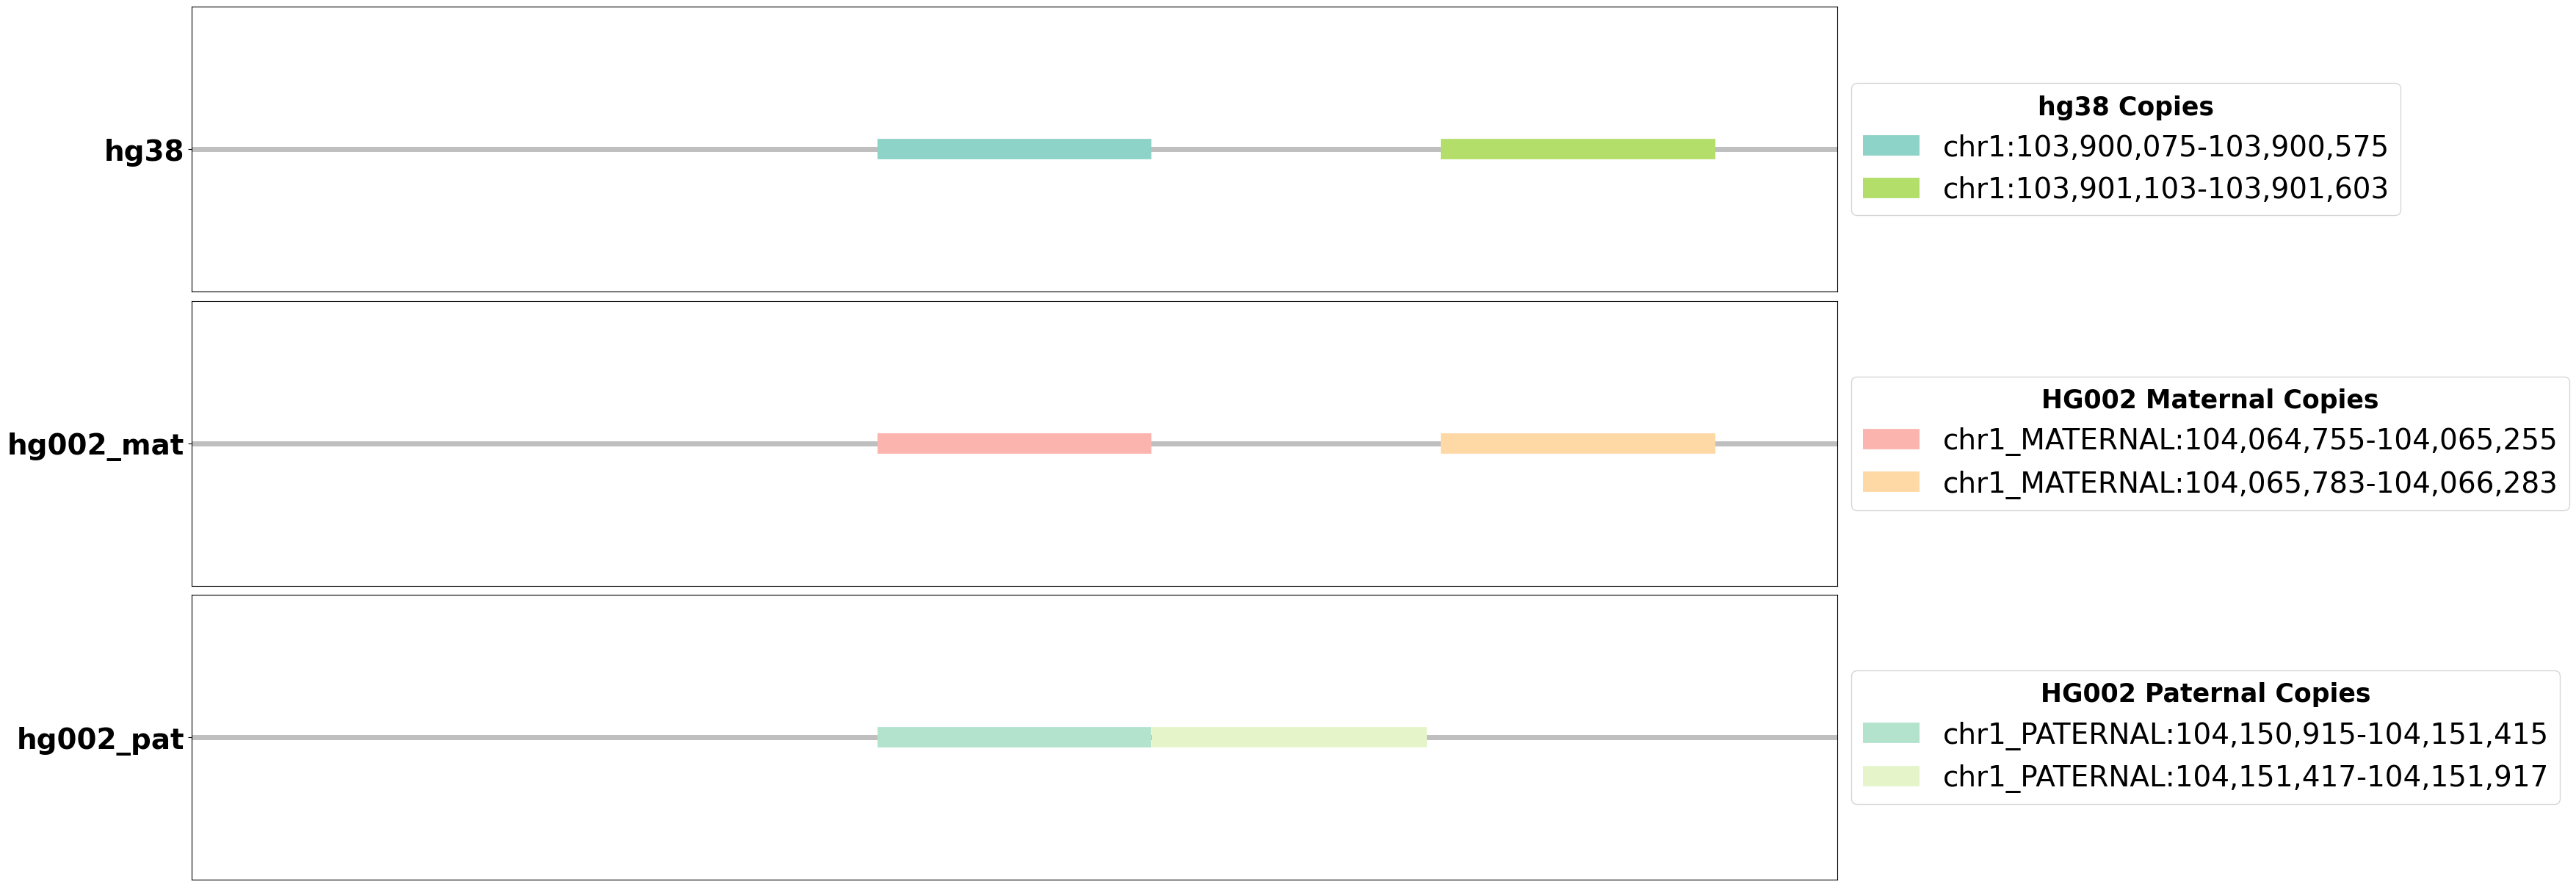

In [28]:
asu.plot_intervals(['chr1:103900075-103900575', 'chr1:103901103-103901603'],['chr1_MATERNAL:104064755-104065255','chr1_MATERNAL:104065783-104066283','chr1_PATERNAL:104150915-104151415','chr1_PATERNAL:104151417-104151917']).plot_interval_single_chrom()

In [7]:
# SIMPLE SMALL HOM DELETION
#ev = evaluate_deletion(ReferenceLocations.hg38, ReferenceLocations.hg002t2t, "chr1:176509082-176509637", hg38, hg002t2t, True)
get_flanking_pairs("chr1:176509082-176509637", ReferenceLocations.hg38, hg38, hg002t2t)


chr1:176508581-176509081 chr1:176509637-176510137 555
chr1_MATERNAL:171410115-171410615 chr1_MATERNAL:171410615-171411115 -1
chr1_PATERNAL:179658215-179658715 chr1_PATERNAL:179658715-179659215 -1


{'ref_flank': [('chr1:176508581-176509081', 'chr1:176509637-176510137', 555)],
 'truth_flank': [('chr1_MATERNAL:171410115-171410615',
   'chr1_MATERNAL:171410615-171411115',
   -1),
  ('chr1_PATERNAL:179658215-179658715',
   'chr1_PATERNAL:179658715-179659215',
   -1)]}

In [8]:
# COMPLEX DELETION chr1:247687159-247693213
# Has 6 matches to hg38 chr1, why?
#ev = evaluate_deletion(ReferenceLocations.hg38, ReferenceLocations.hg002t2t, "chr1:247687159-247693213", hg38, hg002t2t)
get_flanking_pairs("chr1:247687159-247693213", ReferenceLocations.hg38, hg38, hg002t2t)


chr1:247686658-247687158 chr1:247693213-247693713 6054
chr1_PATERNAL:250815713-250816212 chr1_PATERNAL:250816214-250816714 1
chr1_MATERNAL:242719961-242720460 chr1_MATERNAL:242720462-242720962 1


{'ref_flank': [('chr1:247686658-247687158', 'chr1:247693213-247693713', 6054)],
 'truth_flank': [('chr1_PATERNAL:250815713-250816212',
   'chr1_PATERNAL:250816214-250816714',
   1),
  ('chr1_MATERNAL:242719961-242720460',
   'chr1_MATERNAL:242720462-242720962',
   1)]}

In [9]:
# This is a DUP that we are going to check if it is a deletion
#ev = evaluate_deletion(ReferenceLocations.hg38, ReferenceLocations.hg002t2t, "chr1:248407554-248446847", hg38, hg002t2t)
get_flanking_pairs("chr1:248407554-248446847", ReferenceLocations.hg38, hg38, hg002t2t)

chr1:248407053-248407553 chr1:248446847-248447347 39293
chr1_KI270892v1_alt:57259-57759 chr1_KI270892v1_alt:97265-97765 39505
chr1_KI270761v1_alt:61093-61593 chr1_KI270761v1_alt:100887-101387 39293
chr1_PATERNAL:251533949-251534449 chr1_PATERNAL:251573969-251574468 39519
chr1_MATERNAL:243438352-243438852 chr1_MATERNAL:243478360-243478860 39507


{'ref_flank': [('chr1:248407053-248407553', 'chr1:248446847-248447347', 39293),
  ('chr1_KI270892v1_alt:57259-57759',
   'chr1_KI270892v1_alt:97265-97765',
   39505),
  ('chr1_KI270761v1_alt:61093-61593',
   'chr1_KI270761v1_alt:100887-101387',
   39293)],
 'truth_flank': [('chr1_PATERNAL:251533949-251534449',
   'chr1_PATERNAL:251573969-251574468',
   39519),
  ('chr1_MATERNAL:243438352-243438852',
   'chr1_MATERNAL:243478360-243478860',
   39507)]}

In [10]:
# This is a Dragen DEL call that is filtered by MinQUAL
#ev = evaluate_deletion(ReferenceLocations.hg38, ReferenceLocations.hg002t2t, "chr1:3643704-3644335", hg38, hg002t2t)
get_flanking_pairs("chr1:3643704-3644335", ReferenceLocations.hg38, hg38, hg002t2t)

chr1:3643203-3643703 chr1:3644335-3644835 631
chr1_MATERNAL:3306146-3306646 chr1_MATERNAL:3306768-3307268 121
chr1_PATERNAL:3277055-3277555 chr1_PATERNAL:3277677-3278177 121


{'ref_flank': [('chr1:3643203-3643703', 'chr1:3644335-3644835', 631)],
 'truth_flank': [('chr1_MATERNAL:3306146-3306646',
   'chr1_MATERNAL:3306768-3307268',
   121),
  ('chr1_PATERNAL:3277055-3277555', 'chr1_PATERNAL:3277677-3278177', 121)]}

In [11]:
# This is a Dragen DEL call that is filtered by cnvLength
# Note that the joined sequence on hg002 only matches (0-50) on PATERNAL, and there is no (51-100) match on PATERNAL.
# I think this is because the Dragen caller may be estimating the size too small?
#ev = evaluate_deletion(ReferenceLocations.hg38, ReferenceLocations.hg002t2t, "chr1:14109814-14112366", hg38, hg002t2t)
get_flanking_pairs("chr1:14109814-14112366", ReferenceLocations.hg38, hg38, hg002t2t)

chr1:14109313-14109813 chr1:14112366-14112866 2552
chr1_PATERNAL:13678056-13678556 chr1_PATERNAL:13679334-13679756 777
chr1_MATERNAL:13755517-13756017 chr1_MATERNAL:13758569-13759069 2551


{'ref_flank': [('chr1:14109313-14109813', 'chr1:14112366-14112866', 2552)],
 'truth_flank': [('chr1_PATERNAL:13678056-13678556',
   'chr1_PATERNAL:13679334-13679756',
   777),
  ('chr1_MATERNAL:13755517-13756017',
   'chr1_MATERNAL:13758569-13759069',
   2551)]}

In [12]:
stuff = ['chr10:39521557-39533371']
other_stuff = ['chr10_PATERNAL:39521557-39533371', 'chr10_MATERNAL:39475935-39487740', 'chr10_MATERNAL:39538510-39550326', 
               'chr10_MATERNAL:39486365-39498169', 'chr10_MATERNAL:39496794-39508598', 'chr10_MATERNAL:39507223-39519027', 
               'chr10_MATERNAL:39517652-39529456', 'chr10_MATERNAL:39528081-39539885']

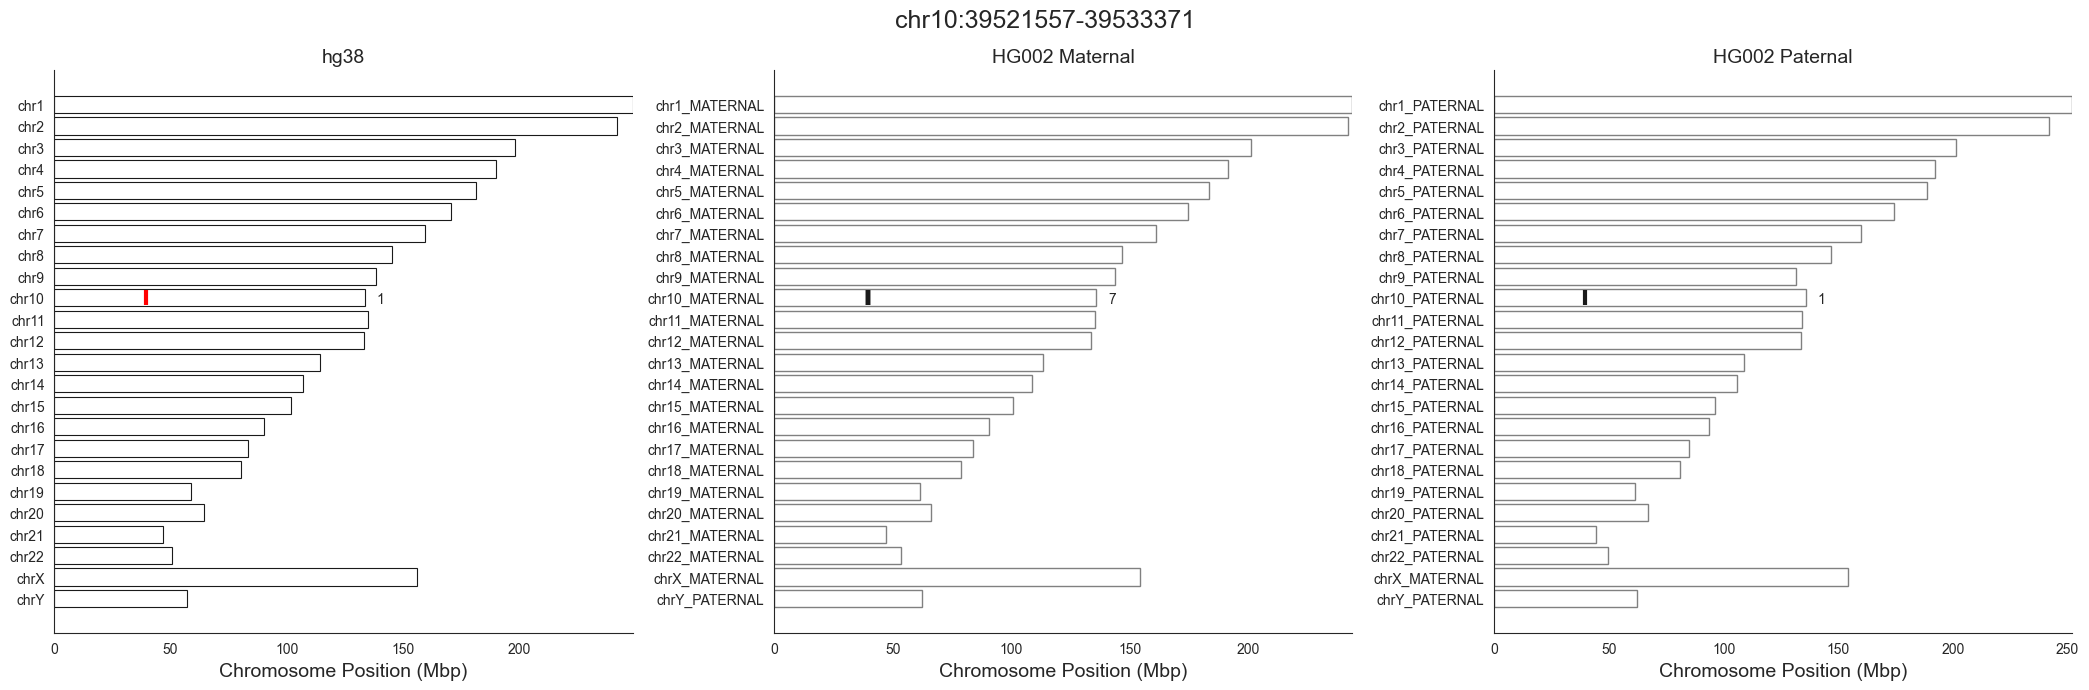

In [13]:
avu.PlotIntervals(stuff, other_stuff).plot_interval_on_chromo()

In [14]:
stuff = []
with open('../resources/chr1_deletions.txt', 'r') as file:
    for line in file:
        try:
            line = line.strip()  # Remove leading/trailing whitespaces and newline characters
            #print(line, check_interval(line, ReferenceLocations.hg38, hg38, hg002t2t))
            print("Event:", line, ip.interval_size(line))
            stuff.append(get_flanking_pairs(line, ReferenceLocations.hg38, hg38, hg002t2t))
            print()
        except:
            raise ValueError("Error on line: " + line)


Event: chr1:103900576-103901103 528
chr1:103900075-103900575 chr1:103901103-103901603 527
chr1_PATERNAL:104159186-104159686 chr1_PATERNAL:104159688-104160188 1
chr1_MATERNAL:104067393-104067893 chr1_MATERNAL:104068421-104068921 527

Event: chr1:104676027-104676834 808
chr1:104675526-104676026 chr1:104676834-104677334 807
chr1_MATERNAL:104848345-104848845 chr1_MATERNAL:104849653-104850153 807
chr1_PATERNAL:104939069-104939565 chr1_PATERNAL:104939577-104940077 11

Event: chr1:105124961-105125821 861
chr1:105124460-105124960 chr1:105125821-105126321 860
chr1_MATERNAL:105297081-105297581 chr1_MATERNAL:105298442-105298942 860
chr1_PATERNAL:105387127-105387618 chr1_PATERNAL:105387620-105388113 1

Event: chr1:108190708-108194629 3922
chr1:108190207-108190707 chr1:108194629-108195129 3921
chr1_PATERNAL:108455827-108456323 chr1_PATERNAL:108456340-108456840 16
chr1_MATERNAL:108367466-108367962 chr1_MATERNAL:108367979-108368479 16

Event: chr1:109059973-109060668 696
chr1:109059472-109059972 chr1

In [15]:
stuff[0]

{'ref_flank': [('chr1:103900075-103900575', 'chr1:103901103-103901603', 527)],
 'truth_flank': [('chr1_PATERNAL:104159186-104159686',
   'chr1_PATERNAL:104159688-104160188',
   1),
  ('chr1_MATERNAL:104067393-104067893',
   'chr1_MATERNAL:104068421-104068921',
   527)]}

In [16]:
stuff[1]

{'ref_flank': [('chr1:104675526-104676026', 'chr1:104676834-104677334', 807)],
 'truth_flank': [('chr1_MATERNAL:104848345-104848845',
   'chr1_MATERNAL:104849653-104850153',
   807),
  ('chr1_PATERNAL:104939069-104939565',
   'chr1_PATERNAL:104939577-104940077',
   11)]}

In [17]:
stuff[2]['ref_flank']

[('chr1:105124460-105124960', 'chr1:105125821-105126321', 860)]

In [18]:
stuff[2]['truth_flank']


[('chr1_MATERNAL:105297081-105297581',
  'chr1_MATERNAL:105298442-105298942',
  860),
 ('chr1_PATERNAL:105387127-105387618', 'chr1_PATERNAL:105387620-105388113', 1)]

In [19]:
from T2T_ACE.genomic_queries import get_flanking_regions
get_flanking_regions("../test/mock_reference.fasta", "chr1:20-25", padding=2)


IndexError: Interval chr1:18-19 is out of bounds for the given chromosome.

In [ ]:
import pysam
with pysam.FastaFile("../test/mock_reference.fasta") as ref_genome:
    # Fetch the sequence
    sequence = ref_genome.fetch("chr1", 0, 101001)
    print(sequence)